# 3과 과제
## 1번
### plotly를 이용한 animation 적용사례를 프로그램과 결과를 제공하라.

#### 접근 방향
- 선형 회귀분석 그래프를 만드는 과정에 있어 Gradient Descent의 작동 모습에 대해 plotly를 이용하여 Animation을 만들어보기.

In [1]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=1, noise=50, random_state=543)

In [6]:
def linear_regression(X, y, m_current=0, b_current=0, 
                      epochs=1000, learning_rate=0.0001):
  N = float(len(y))
  ms = [m_current]
  bs = [b_current]

  for i in range(epochs):
    y_current = (m_current * X) + b_current
    cost = sum([data ** 2 for data in (y - y_current)]) / N

    m_gradient = -(2/N) * sum(X * (y - y_current))
    b_gradient = -(2/N) * sum(y - y_current)

    m_current = m_current - (learning_rate * m_gradient)
    b_current = b_current - (learning_rate * b_gradient)

    ms.append(m_current)
    bs.append(b_current)

  return ms, bs

In [9]:
ms, bs = linear_regression(X.ravel(), y, epochs=200, learning_rate=0.01)
y_lines = (ms * X + bs).T

In [10]:
import plotly.graph_objects as go

points = go.Scatter(x=X.flatten(), y=y, mode='markers')
line = go.Scatter(x=X.flatten(), y=y_lines[0])
layout = go.Layout(title_text='Gradient Descent Animation')
fig = go.Figure(data=[points, line])
fig.show()

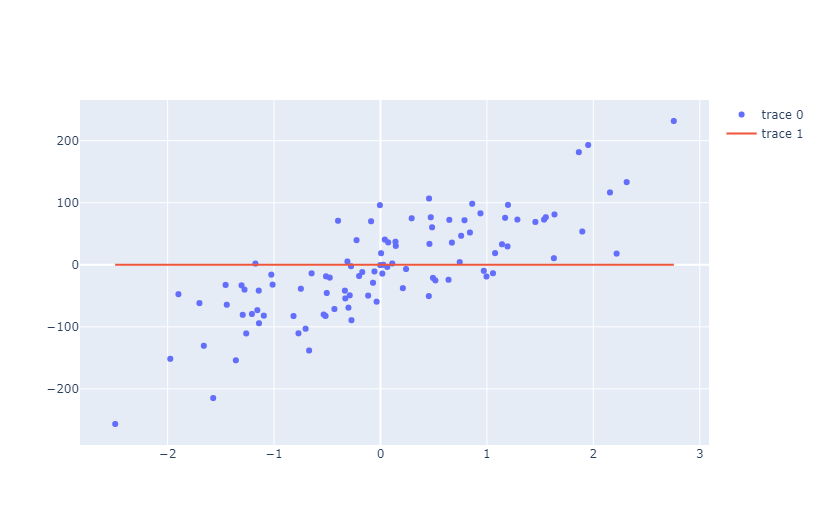

In [11]:
frames = []

for i in range(len(y_lines)):
  line = go.Scatter(x=X.flatten(), y=y_lines[i])
  button = {
      "type": "buttons",
      "buttons": [
                  {
                      "label": "Play",
                      "method": "animate",
                      "args": [None, {"frame": {"duration": 20}}]
                  }
      ]
  }

  layout = go.Layout(updatemenus=[button],
                     title_text=f"Gradient Descent Step {i}")
  
  frame = go.Frame(
      data = [points, line],
      layout = go.Layout(title_text=f"Gradient Descent Step {i}")
  )

  frames.append(frame)

In [12]:
fig = go.Figure(data=[points, line],
                frames=frames,
                layout=layout)

fig.show()

### Step 200

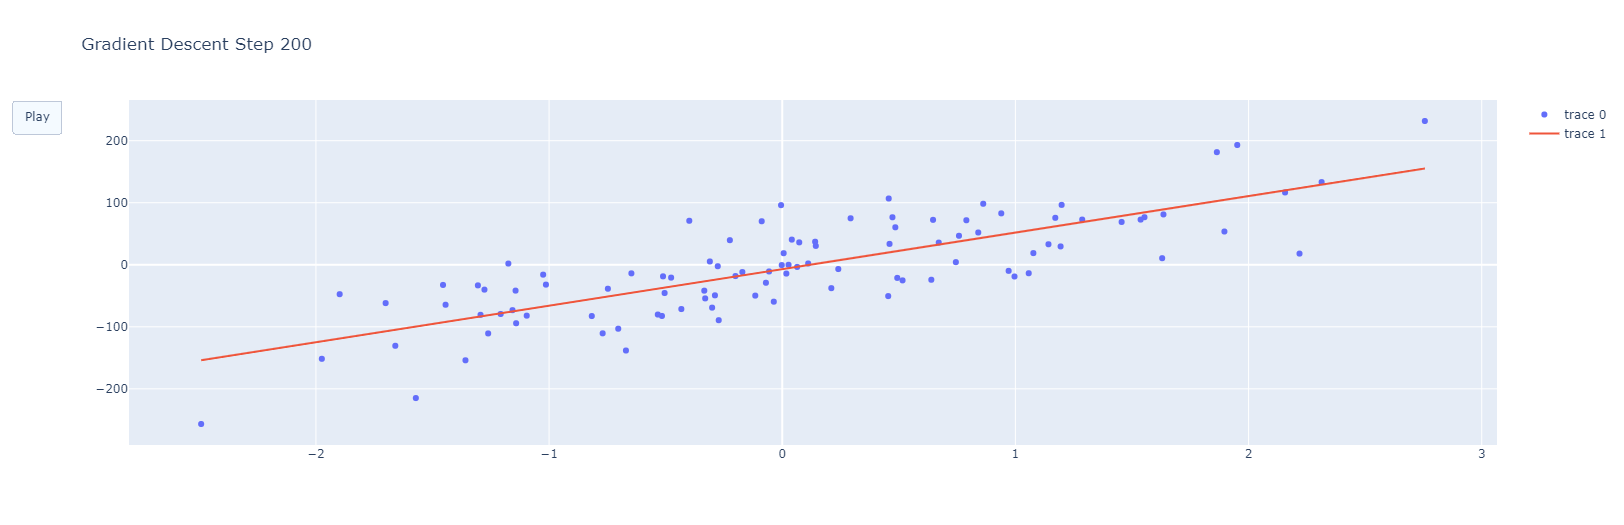